# Hello, Deep Learning Reading Group
## A curated version of TF tutorials 1 & 2
### Archy de Berker & Zeb Kurth-Nelson


When you think of doing things in TensorFlow, you might want to think of creating tensors (like matrices), adding operations (that output other tensors), and then executing the computation (running the computational graph). 

In particular, it's important to realize that when you add an operation on tensors, it doesn't execute immediately.

Rather, TensorFlow waits for you to define all the operations you want to perform. Then, TensorFlow optimizes the computation graph, deciding how to execute the computation, before generating the data. Because of this, a tensor in TensorFlow isn't so much holding the data as a placeholder for holding the data, waiting for the data to arrive when a computation is executed.

## Adding two vectors in TensorFlow

Let's start with something that should be simple. Let's add two length four vectors (two 1st-order tensors):

$\begin{bmatrix} 1. & 1. & 1. & 1.\end{bmatrix} + \begin{bmatrix} 2. & 2. & 2. & 2.\end{bmatrix} = \begin{bmatrix} 3. & 3. & 3. & 3.\end{bmatrix}$

In [12]:
import tensorflow as tf

input1 = tf.constant([1.0, 1.0, 1.0, 1.0])
input2 = tf.constant([2.0, 2.0, 2.0, 2.0])
output = tf.add(input1, input2)


with tf.Session():
  result = output.eval()
  
print result

[ 3.  3.  3.  3.]


What we're doing is creating two vectors, [1.0, 1.0, 1.0, 1.0] and [2.0, 2.0, 2.0, 2.0], and then adding them. Note that we actually have to use the tf function **tf.add** to do this - we can't just use +.

We can do a similar thing using the very commonly utilised python package numpy:

In [23]:
import numpy as np
x, y = np.full(4, 1.0), np.full(4, 2.0)
print "{} + {} = {}".format(x, y, x + y)

[ 1.  1.  1.  1.] + [ 2.  2.  2.  2.] = [ 3.  3.  3.  3.]


Note that if we wanted matrices instead of vectors, the same syntax applies:

In [25]:
import numpy as np
x, y = np.full([4,2], 1.0), np.full([4,2], 2.0)
print "{} + {} = {}".format(x, y, x + y)

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]] + [[ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]] = [[ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]]


One important thing to note for those coming from matlab: python isn't build primarily for doing maths. If you forget this and try to add, subtract, and multiply things in a laissez-faire manner, things go wrong:

In [43]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
c = a+b

print "a="
print a 
print "b=" 
print b
print "c=" 
print c

print type(c)


a=
[1, 2, 3, 4]
b=
[5, 6, 7, 8]
c=
[1, 2, 3, 4, 5, 6, 7, 8]
<type 'list'>


So the default type when you just stick things in square brackets is NOT a numerical vector - it's a list. And when you use the + operation, it doesn't ADD your vectors - it CONCATENATES your list!

By  now you've noticed that there are three basic kinds of things we've been dealing with: native Python objects (like a = [1, 2, 3, 4]), numpy objects (like x = np.full(4, 1.0)), and TensorFlow objects (like input1 = tf.constant([1.0, 1.0, 1.0, 1.0])).

Coming back to TensorFlow objects, these kind of objects are actually smart enough to understand that the + operator should mean vector addition, so we don't need to use tf.add() as we did above:

In [19]:
input1 = tf.constant([1.0, 1.0, 1.0, 1.0])
input2 = tf.constant([2.0, 2.0, 2.0, 2.0])
output =input1+ input2

with tf.Session():
  result = output.eval()

print result

[ 3.  3.  3.  3.]


## Details of adding two vectors in TensorFlow

The example above of adding two vectors involves a lot more than it seems, so let's look at it in more depth.

>`import tensorflow as tf`

This import brings TensorFlow's public API into our IPython runtime environment.

>`with tf.Session():`

When you run an operation in TensorFlow, you need to do it in the context of a `Session`. 

A session holds the **computation graph**, which contains the tensors and the operations. When you create tensors and operations, they are not executed immediately, but wait for other operations and tensors to be added to the graph, only executing when finally requested to produce the results of the session. Deferring the execution like this provides additional opportunities for parallelism and optimization, as TensorFlow can decide how to combine operations and where to run them after TensorFlow knows about all the operations. 

>>`input1 = tf.constant([1.0, 1.0, 1.0, 1.0])`

>>`input2 = tf.constant([2.0, 2.0, 2.0, 2.0])`

The next two lines create tensors using a convenience function called `constant`, which is similar to numpy's `array` and numpy's `full`. If you look at the code for `constant`, you can see the details of what it is doing to create the tensor. In summary, it creates a tensor of the necessary shape and applies the constant operator to it to fill it with the provided values. The values to `constant` can be Python or numpy arrays. `constant` can take an optional shape parameter, which works similarly to numpy's `fill` if provided, and an optional name parameter, which can be used to put a more human-readable label on the operation in the TensorFlow operation graph.

>>`output = tf.add(input1, input2)`

You might think `add` just adds the two vectors now, **but it doesn't quite do that**. What it does is put the `add` operation **into the computational graph**. The results of the addition aren't available yet. They've been put in the computation graph, but the computation graph hasn't been executed yet.

>>`result = output.eval()`

>>`print result`

`eval()` is also slightly more complicated than it looks. Yes, it does get the value of the vector (tensor) that results from the addition. It returns this as a numpy array, which can then be printed. But, it's important to realize it also **runs the computation graph at this point, because we demanded the output from the operation node of the graph; to produce that, it had to run the computation graph**. So, this is the point where the addition is actually performed, not when `add` was called, as `add` just put the addition operation into the TensorFlow computation graph.

# Key Concept 1: Tensorflow operations aren't performed until the Tensorflow session is evaluated

##  Adding two matrices

Next, let's do something very similar, adding two matrices:

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} + 
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} = 
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [29]:
import tensorflow as tf
import numpy as np

input1 = tf.constant(-3.0, shape=[2, 3])
input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
output = tf.add(input1, input2)
  
with tf.Session():
  print input2.eval()
  print output.eval()


[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[-2. -1.  0.]
 [ 1.  2.  3.]]


The new operations that we're introducing here:

  *np.reshape* : this takes a vector, and applies the shape argument to it, much like in matlab
  
  *np.arange*  : this produces a range of numbers (like matlab 1:n). But (oddly, in our opinion), it includes the FIRST value but not the LAST.
  This is because python uses zero based indexing ([0] refers to the first item in the array) and if we start from zero, then the second argument would tell us *how many* items we'll get.
  
  So we get the numbers 1-6. When we add the constant -3 to each element of the matrix, we end up with -2 through +3. We can also specify the *type* here (like float32). This is important, because we will struggle later on if our numbers end up in different formats.

## Task 1: Modify the above code to do multiplication of a weights matrix with some inputs to produce an output

You should use the tensorflow command **tf.matmul** to do the multiplication, and **np.random.randn** to initialise your weights matrix with randomweights.

Try using a placeholder variable to give you an adjustable number of features (i.e. the length of the input, and the first dimension of the weights matrix).

At the end, print out your inputs and output.

In [30]:
# Put your answer here (HINT: should look very similar to the code just above, but using multiplication instead of addition)




What we have here is a one-layer linear neural network. This could be trained to match some function if we adjusted the weights based on some examples of inputs and outputs.


## Use of variables

Let's look at adding two small matrices in a loop, not by creating new tensors every time, but by updating the existing values and then re-running the computation graph on the new data. 

This happens a lot with machine learning models, where we change some parameters each time such as gradient descent on some weights and then perform the same computations over and over again.

In [5]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np

# Set up two variables, total and weights, that we'll change repeatedly.
total = tf.Variable(tf.zeros([1,2])) 
weights = tf.Variable(tf.zeros([1,2]))  # these values won't actually be used, but we have to initialize the Variable.

# This only adds the operators to the graph right now. The assignment
# and addition operations are not performed yet.
update_weights = tf.assign(weights, tf.random_uniform([1, 2], -1.0, 1.0))
update_total = tf.assign(total, tf.add(total, weights))

with tf.Session() as sess:
  # Initialize the variables we defined above.
  tf.initialize_all_variables().run()

  for _ in range(5):
    # Actually run the operation graph, so randomly generate weights and then
    # add them into the total. Order does matter here. We need to update
    # the weights before updating the total.
    sess.run(update_weights)
    sess.run(update_total)
    
    print weights.eval(), total.eval()

[[ 0.95963669 -0.43129063]] [[ 0.95963669 -0.43129063]]
[[-0.97799993  0.46899056]] [[-0.01836324  0.03769994]]
[[ 0.68374348  0.17845488]] [[ 0.66538024  0.21615481]]
[[ 0.90204906 -0.432796  ]] [[ 1.5674293  -0.21664119]]
[[ 0.36887693  0.68009949]] [[ 1.93630624  0.4634583 ]]


# Key Concept 2: 'Variables' in TF have a special meaning: they're things that we're going to repeatedly give new values to, using the command 'assign' 

Starting off, the code creates two variables, `total` and `weights`. `total` is initialized to \[0, 0\]. Meanwhile, `weights` will be set to new random values between -1 and 1, every time we go through the loop and call sess.run(update_weights).

Next, two assignment operators are added to the graph, one that updates weights with random values from [-1, 1], the other that updates the total with the new weights. Again, the operators are not executed here. In fact, this isn't even inside the loop. We won't execute these operations until the `eval` call inside the loop.

Finally, in the for loop, we run each of the operators. In each iteration of the loop, this executes the operators we added earlier, first putting random values into the weights, then updating the totals with the new weights. This call uses `eval` on the session; the code also could have called `eval` on the operators (e.g. `update_weights.eval`).

It can be a little hard to wrap your head around exactly what computation is done when. The important thing to remember is that computation is only performed on demand.

Variables can be useful in cases where you have a large amount of computation and data that you want to use over and over again with just a minor change to the input each time. That happens quite a bit with neural networks, for example, where you just want to update the weights each time you go through the batches of input data, then run the same operations over again.

# Task 2: The code below runs a simple model, where we find a weight which scales the input to match a target. We also give you some code for plotting. Combine them to plot the progress of the model towards convergence. You may want to fiddle with the learning rate and number of iterations to get pretty data.

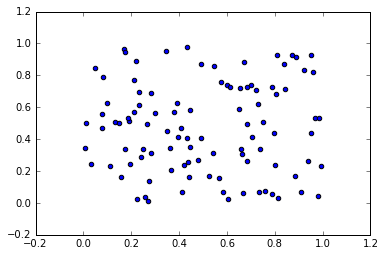

In [92]:
# Basic plotting

import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(np.random.random([100,1]),np.random.random([100,1]))


In [97]:
# Target-matching model

import tensorflow as tf
import numpy as np

# we have a single input
print 
input     = tf.constant(np.random.random([1]).astype(np.float32))
target    = tf.constant(np.random.random([1]).astype(np.float32))

alpha     = tf.constant([0.1])
nIters    = 30

totalTrack = np.zeros([nIters,1])
# Set up two variables, total and weights, that we'll change repeatedly.

weights = tf.Variable(tf.random_uniform([1]))
total   = tf.Variable(tf.zeros([1]))


# This only adds the operators to the graph right now. The assignment
# and addition operations are not performed yet.
update_total = tf.assign(total, tf.mul(input, weights))
update_weights = tf.assign(weights, weights-(alpha*(total-target)))


with tf.Session() as sess:
    
  # Initialize the variables we defined above.
  tf.initialize_all_variables().run()

  for _ in range(nIters):
    # Actually run the operation graph, so randomly generate weights and then
    # add them into the total. Order does matter here. We need to update
    # the weights before updating the total.
    sess.run(update_weights)
    sess.run(update_total)
    
    totalTrack[_]=total.eval()
    
    print input.eval(),weights.eval(), total.eval(), target.eval(), total.eval()-target.eval()


[ 0.95002389] [ 0.16185382] [ 0.15376499] [ 0.19043355] [-0.03666855]
[ 0.95002389] [ 0.16552067] [ 0.15724859] [ 0.19043355] [-0.03318496]
[ 0.95002389] [ 0.16883916] [ 0.16040123] [ 0.19043355] [-0.03003232]
[ 0.95002389] [ 0.1718424] [ 0.16325438] [ 0.19043355] [-0.02717917]
[ 0.95002389] [ 0.17456031] [ 0.16583647] [ 0.19043355] [-0.02459708]
[ 0.95002389] [ 0.17702001] [ 0.16817324] [ 0.19043355] [-0.02226031]
[ 0.95002389] [ 0.17924604] [ 0.17028801] [ 0.19043355] [-0.02014554]
[ 0.95002389] [ 0.18126059] [ 0.17220189] [ 0.19043355] [-0.01823166]
[ 0.95002389] [ 0.18308376] [ 0.17393394] [ 0.19043355] [-0.01649961]
[ 0.95002389] [ 0.18473372] [ 0.17550145] [ 0.19043355] [-0.0149321]
[ 0.95002389] [ 0.18622693] [ 0.17692004] [ 0.19043355] [-0.01351351]
[ 0.95002389] [ 0.18757829] [ 0.17820385] [ 0.19043355] [-0.0122297]
[ 0.95002389] [ 0.18880126] [ 0.17936571] [ 0.19043355] [-0.01106784]
[ 0.95002389] [ 0.18990804] [ 0.18041718] [ 0.19043355] [-0.01001637]
[ 0.95002389] [ 0.1909

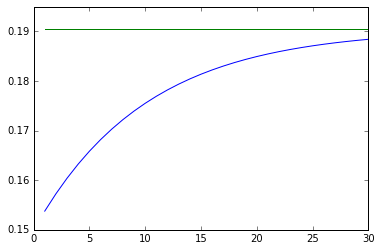

In [104]:

import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(np.arange(1,nIters+1),totalTrack)

with tf.Session() as sess:
    
  plt.plot(np.arange(1,nIters+1),np.full([nIters,1],target.eval()))

Top tips for this section:

- It's important to get your types matching. The default for TF appears to be float32 - if you create something with tf.zeros, tf.constant etc. it will be float32. For numpy, things often come out as float64. You need to use the function .astype(np.float32) when you create a numpy variable in order to match types


- If you define constants using a tensorflow function e.g. input = tf.random_uniform, it will be reassigned every time you run the session. This is crucial, because in situations in which you are iteratively updating something - such as the weights in a model - anything you have randomly assigned will be REASSIGNED on every loop. This is a bad thing. To avoid this, use numpy functions to set up your constants:

    input     = tf.constant(np.random.random([1]).astype(np.float32))
    
    
- The only things that actually need to be placed inside the session definition (i.e. after the with tf.session() bit) are evaluations; such as initializing variables, and running loops. * If you want to re-use any of your variables from the model which are tensorflow objects, such as input, you'll need to start a sessioni nyour plotting code *

# Using the TF gradient descent algorithm 

Now we're going to alter our model to use Tensorflow's heavy lifting capabilities for model optimisation.

To do this, we only need two lines:

1. To tell TF what to minimise. We're going to choose the squared error
2. To establish the optimiser, with a certain step size, with the intention of minimising the variable we created in the first step

Now, we can use sess.run(ourOptimiser) to perform the optimisation!

Your job here is to figure out a reasonable loss function.

In [4]:
# Target-matching model

import tensorflow as tf
import numpy as np

# we have a single input
print 
input     = tf.constant(np.random.random([1]).astype(np.float32))
target    = tf.constant(np.random.random([1]).astype(np.float32))

alpha     = tf.constant([0.1])
nIters    = 40

totalTrack = np.zeros([nIters,1])
# Set up two variables, total and weights, that we'll change repeatedly.

weights = tf.Variable(tf.random_uniform([1]))

# This only adds the operators to the graph right now. The assignment
# and addition operations are not performed yet.
total = tf.mul(input, weights)

# *****************************************    Enter your loss function here!
loss = 

# Optimizer
ourOptimiser = tf.train.GradientDescentOptimizer(0.5).minimize(loss)


with tf.Session() as sess:
    
  # Initialize the variables we defined above.
  tf.initialize_all_variables().run()

  for _ in range(nIters):
    # Actually run the operation graph, so randomly generate weights and then
    # add them into the total. Order does matter here. We need to update
    # the weights before updating the total.
 

    sess.run(ourOptimiser)
    
    
    totalTrack[_]=total.eval()
    
    print input.eval(),weights.eval(), total.eval(), target.eval(), total.eval()-target.eval()

SyntaxError: invalid syntax (<ipython-input-4-5c927308b6a2>, line 24)

# Final task: try plotting totalTrack to see how the output converges over iterations

In [6]:
# enter your plotting here

# HINT - this plotting code should look very similar to the above plotting code